# Visualizations

This notebook contains publication-quality visualizations for key insights from the credit card transactions dataset.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For saving images
import os

# Load cleaned dataset
df = pd.read_csv("../data/cleansed/FraudTest_clean.csv")

# Create reports folder if it doesn't exist
os.makedirs("../reports", exist_ok=True)


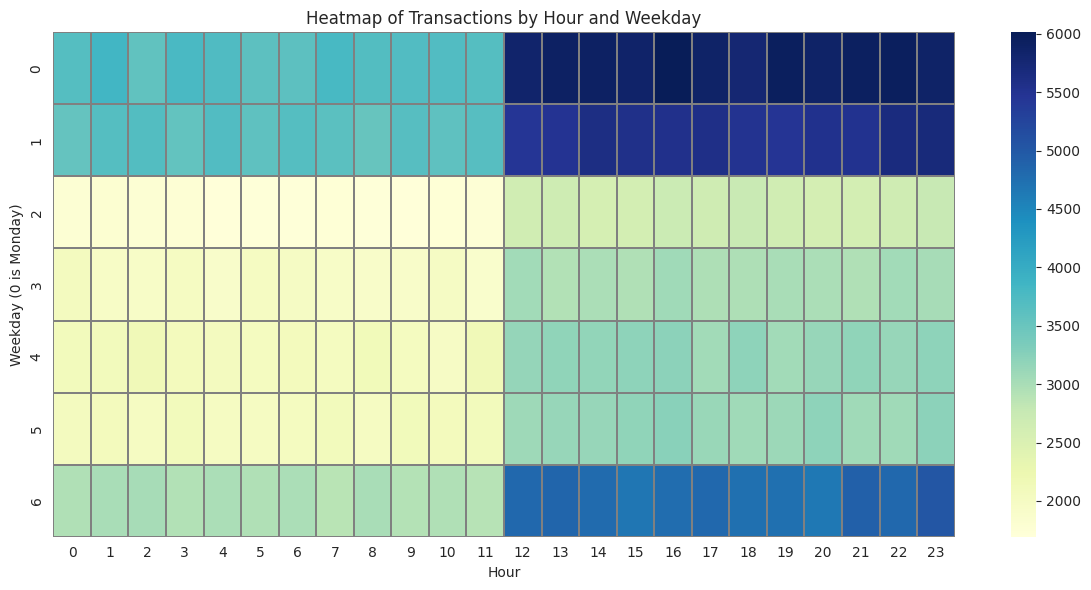

In [3]:
# Create pivot table
pivot = df.pivot_table(index="weekday", columns="hour", values="amt", aggfunc="count")

# Plot heatmap
plt.figure(figsize=(12,6))
sns.heatmap(pivot, cmap="YlGnBu", linewidths=0.3, linecolor='gray')
plt.title("Heatmap of Transactions by Hour and Weekday")
plt.xlabel("Hour")
plt.ylabel("Weekday (0 is Monday)")
plt.tight_layout()
plt.savefig("../reports/heatmap_hour_weekday.png")
plt.show()


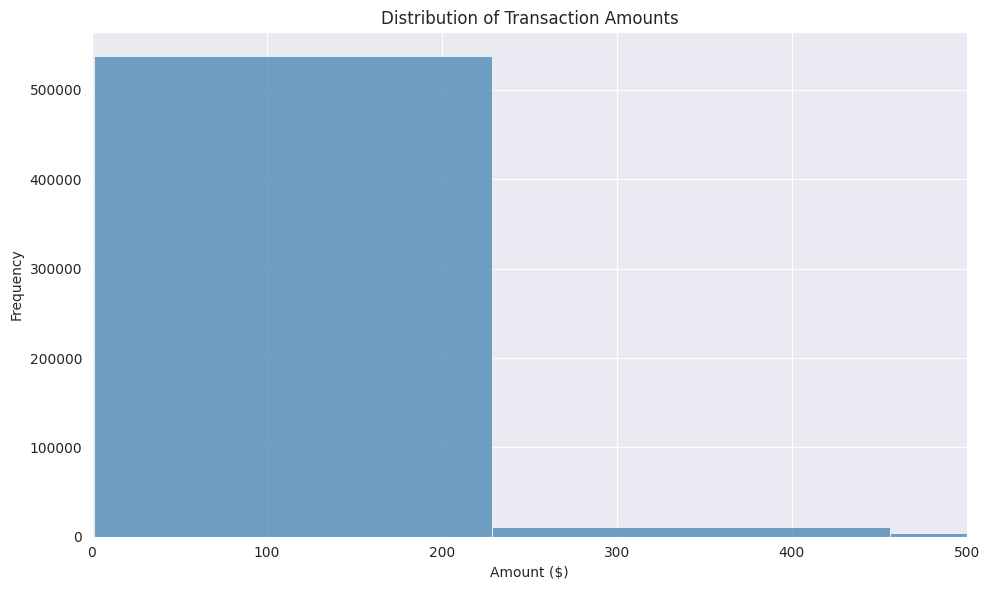

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df["amt"], bins=100, color="steelblue")
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency")
plt.xlim(0, 500)  # Optional: cut off high-end outliers
plt.grid(True)
plt.tight_layout()
plt.savefig("../reports/hist_amounts.png")
plt.show()


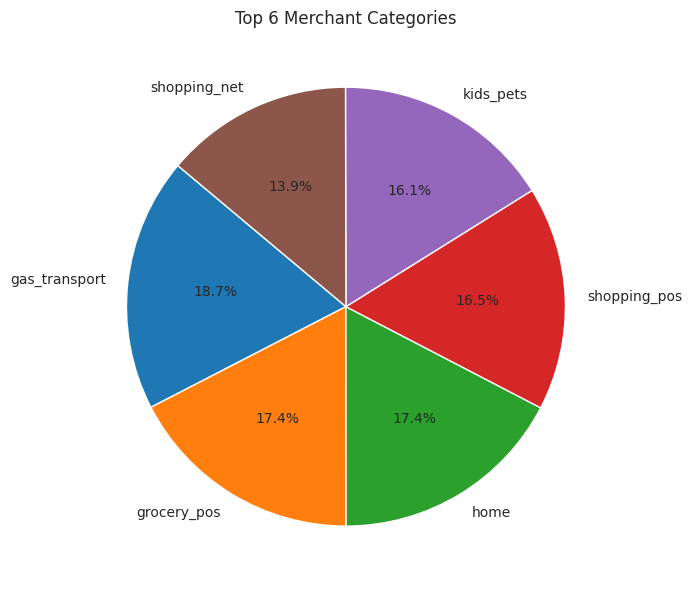

In [5]:
category_counts = df["category"].value_counts().head(6)

plt.figure(figsize=(7,7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 6 Merchant Categories")
plt.tight_layout()
plt.savefig("../reports/pie_merchant_categories.png")
plt.show()


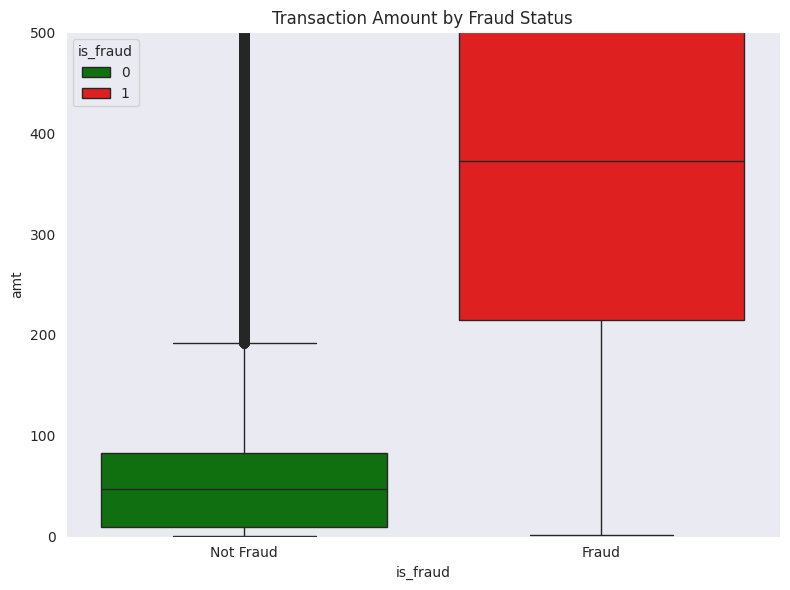

In [6]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="is_fraud", hue="is_fraud", y="amt", palette=["green", "red"])
plt.title("Transaction Amount by Fraud Status")
plt.xticks([0,1], ["Not Fraud", "Fraud"])
plt.ylim(0, 500)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("../reports/boxplot_fraud_amounts.png")
plt.show()
